In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
tweets = pd.read_csv("https://raw.githubusercontent.com/sashaperigo/Trump-Tweets/master/data.csv")
tweets['Date'] = pd.to_datetime(tweets['Date'])
tweets = tweets.set_index('Date').sort_index()
# Assign a sentiment
tweets['sentiment'] = tweets['Text'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound'])
tweets.head()

,Text,Favorites,Retweets,Tweet ID,sentiment
Date,,,,,
2009-05-04 14:54:25,Be sure to tune in and watch Donald Trump on L...,132,179,1698308935,0.5255
2009-05-04 21:00:10,Donald Trump will be appearing on The View tom...,2,1,1701461182,0.7712
2009-05-08 09:38:08,Donald Trump reads Top Ten Financial Tips on L...,1,2,1737479987,0.6468
2009-05-08 16:40:15,New Blog Post: Celebrity Apprentice Finale and...,0,1,1741160716,0.0000
2009-05-12 10:07:28,"""My persona will never be that of a wallflower...",1903,1382,1773561338,0.0000


# What are the most positive and most negative tweets?

In [ ]:
for tweet in tweets.sort_values('sentiment').iloc[:5]['Text']:
    print(tweet)

I love the Mexican people, but Mexico is not our friend. They're killing us at the border and they're killing us on jobs and trade. FIGHT!
If Graydon Carter's very dumb bosses would fire him for his terrible circulation numbers at failing Vanity Fair-his bad food restaurants die
If Graydon Carter's very dumb bosses would fire him for his terrible circulation numbers at failing Vanity Fair-his bad food restaurants die
At least 12 dead and 50 wounded in Colorado--bring back fast trials & death penalty for mass murderers & terrorists.
How come every time I show anger, disgust or impatience, enemies say I had a tantrum or meltdown—stupid or dishonest people?


In [ ]:
for tweet in tweets.sort_values('sentiment').iloc[-5:]['Text']:
    print(tweet)

"@VladimirRussia7  @realDonaldTrump You are the best #billionare and the great teacher!I love your inspiring books!" Thanks and good luck.
"@barnard_sonja: @realDonaldTrump I wish I had your confidence!"  WIN, WIN, WIN and you will develop great confidence!
"@LisaMills62: @realDonaldTrump You're so successful & admirable yet your greatest masterpiece remains your awesome children!"  Thanks!
.@bubbawatson  What a great player you have turned out to be but also, what a great guy! Congratulations on another fantastic Masters win.
Good luck and best wishes to my dear friend, the wonderful and very talented Joan Rivers!  Winner of Celebrity Apprentice, amazing woman.


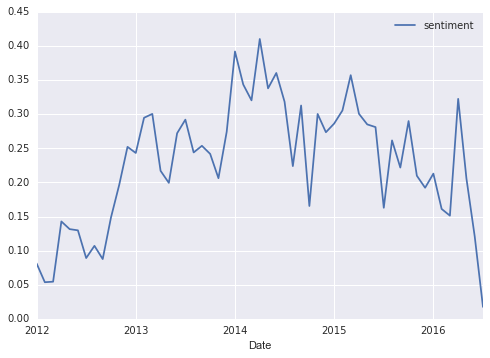

In [ ]:
tweets[tweets.index >= '2012'].groupby(pd.TimeGrouper(freq='1m'))[['sentiment']].mean().plot()

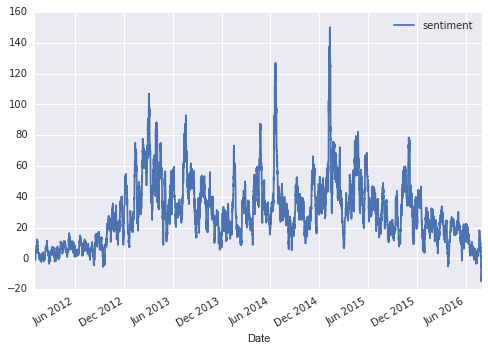

In [ ]:
tweets[tweets.index >= '2012'].rolling('7d')[['sentiment']].sum().sort_values('sentiment').plot()

In [ ]:
recent_tweets = tweets[tweets.index >= "2015"].copy()

In [ ]:
import numpy as np
quantile_bin_ranges = np.linspace(0, 1, 11)
retweet_bins = [recent_tweets['Retweets'].quantile(n) for n in quantile_bin_ranges]
retweet_bin_labels = (quantile_bin_ranges * 100)[:-1].astype(int).astype(str)
recent_tweets['RT bin'] = pd.cut(recent_tweets['Retweets'], bins=retweet_bins, labels=retweet_bin_labels)

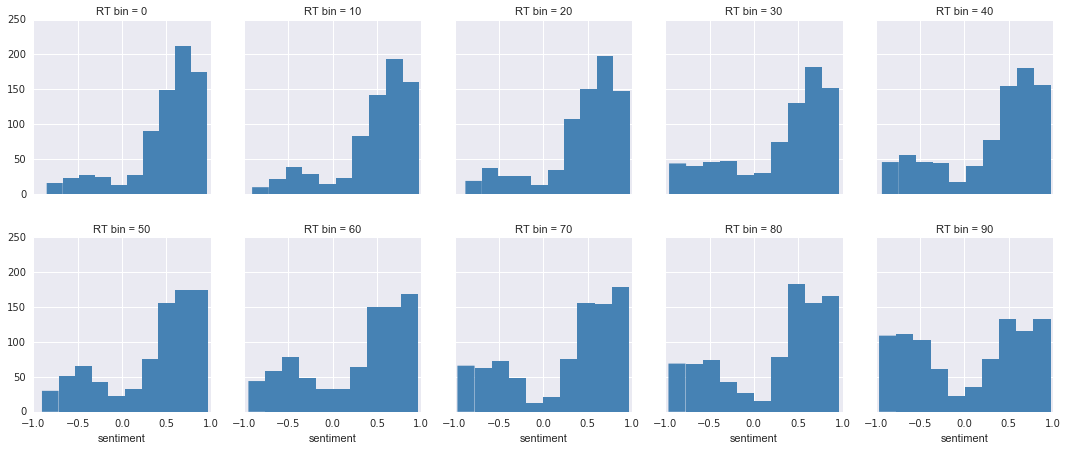

In [ ]:
g = sns.FacetGrid(recent_tweets.query('sentiment != 0'), col='RT bin', col_wrap=5, margin_titles=True)
g.map(plt.hist, "sentiment", color="steelblue", lw=0)